In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy
import rasterio

In [2]:
WCh_ds = xr.open_dataset("/home/UOCNT/jco166/Assignment_3/WCh_dataset.nc")

In [3]:
WCh_ds

<xarray.Dataset>
Dimensions:            (geometry: 1, height: 1, time: 54388)
Coordinates:
  * geometry           (geometry) object '01010000000CE544BB0A6E65400E677E350...
  * height             (height) float32 2.0
  * time               (time) datetime64[ns] 2017-06-26T10:00:00 ... 2023-10-...
Data variables:
    externalId         (geometry) object ...
    lat                (geometry) float64 ...
    lon                (geometry) float64 ...
    name               (geometry) object ...
    ref                (geometry) object ...
    station_id         (geometry) object ...
    wind_speed         (time, geometry, height) float32 ...
    wind_direction     (time, geometry, height) float32 ...
    temperature        (time, geometry, height) float32 ...
    relative_humidity  (geometry, height, time) float32 ...
    precipitation      (time, geometry, height) float32 ...
Attributes:
    result_type:     time_series
    title:           mean wind_speed in m/s of the atmosphere by a sensor_rec...
    institution:     FENZ
    license:         https://creativecommons.org/licenses/by/4.0/
    source:          sensor_recording
    system_version:  4
    version_date:    2022-03-23T00:00:00

In [4]:
WWS = WCh_ds['wind_speed']
WWD = WCh_ds['wind_direction']
WAT = WCh_ds['temperature']
WRH = WCh_ds['relative_humidity']
WP = WCh_ds['precipitation']

In [5]:
first_time_WWS = WCh_ds['wind_speed'].time.values[0]
end_time_WWS = WCh_ds['wind_speed'].time.values[-1]

first_time_WWD = WCh_ds['wind_direction'].time.values[0]
end_time_WWD = WCh_ds['wind_direction'].time.values[-1]

first_time_WAT = WCh_ds['temperature'].time.values[0]
end_time_WAT = WCh_ds['temperature'].time.values[-1]

first_time_WRH = WCh_ds['relative_humidity'].time.values[0]
end_time_WRH = WCh_ds['relative_humidity'].time.values[-1]

first_time_WP = WCh_ds['precipitation'].time.values[0]
end_time_WP = WCh_ds['precipitation'].time.values[-1]

In [8]:
print(first_time_WWS)
print(end_time_WWS)

print(first_time_WWD)
print(end_time_WWD)

print(first_time_WAT)
print(first_time_WAT)

print(first_time_WRH)
print(end_time_WRH)

print(first_time_WP)
print(end_time_WP)

2017-06-26T10:00:00.000000000
2023-10-18T02:00:00.000000000
2017-06-26T10:00:00.000000000
2023-10-18T02:00:00.000000000
2017-06-26T10:00:00.000000000
2017-06-26T10:00:00.000000000
2017-06-26T10:00:00.000000000
2023-10-18T02:00:00.000000000
2017-06-26T10:00:00.000000000
2023-10-18T02:00:00.000000000


In [9]:
WtM_Wds = WCh_ds.sel(time=slice("2023-10-11","2023-10-16"))

In [10]:
WtM_Wds

<xarray.Dataset>
Dimensions:            (geometry: 1, height: 1, time: 144)
Coordinates:
  * geometry           (geometry) object '01010000000CE544BB0A6E65400E677E350...
  * height             (height) float32 2.0
  * time               (time) datetime64[ns] 2023-10-11 ... 2023-10-16T23:00:00
Data variables:
    externalId         (geometry) object 'CLIDB_42927'
    lat                (geometry) float64 -41.91
    lon                (geometry) float64 171.4
    name               (geometry) object 'Charleston'
    ref                (geometry) object 'charleston'
    station_id         (geometry) object '9b1e008f987d17ed523f23aa'
    wind_speed         (time, geometry, height) float32 3.22 4.5 ... 1.78 2.12
    wind_direction     (time, geometry, height) float32 211.8 212.6 ... 205.6
    temperature        (time, geometry, height) float32 10.8 11.5 ... 12.3 12.2
    relative_humidity  (geometry, height, time) float32 73.2 73.2 ... 73.2 73.2
    precipitation      (time, geometry, height) float32 0.0 0.0 0.0 ... 0.8 0.0
Attributes:
    result_type:     time_series
    title:           mean wind_speed in m/s of the atmosphere by a sensor_rec...
    institution:     FENZ
    license:         https://creativecommons.org/licenses/by/4.0/
    source:          sensor_recording
    system_version:  4
    version_date:    2022-03-23T00:00:00

In [11]:
WtM_WWS_grp_hrly = WtM_Wds.wind_speed.groupby("time.hour").mean(dim="time")
WtM_WWD_grp_hrly = WtM_Wds.wind_direction.groupby("time.hour").mean(dim="time")
WtM_WAT_grp_hrly = WtM_Wds.temperature.groupby("time.hour").mean(dim="time")
WtM_WRH_grp_hrly = WtM_Wds.relative_humidity.groupby("time.hour").mean(dim="time")
WtM_WP_grp_hrly = WtM_Wds.precipitation.groupby("time.hour").mean(dim="time")

In [12]:
WtM_WWS_grp_hrly_val = WtM_WWS_grp_hrly.hour
WtM_WWS_grp_hrly_mean = WtM_WWS_grp_hrly.values

WtM_WWD_grp_hrly_val = WtM_WWD_grp_hrly.hour
WtM_WWD_grp_hrly_mean = WtM_WWD_grp_hrly.values

WtM_WAT_grp_hrly_val = WtM_WAT_grp_hrly.hour
WtM_WAT_grp_hrly_mean = WtM_WAT_grp_hrly.values

WtM_WRH_grp_hrly_val = WtM_WRH_grp_hrly.hour
WtM_WRH_grp_hrly_mean = WtM_WRH_grp_hrly.values

WtM_WP_grp_hrly_val = WtM_WP_grp_hrly.hour
WtM_WP_grp_hrly_mean = WtM_WP_grp_hrly.values

Text(0, 0.5, 'Wind Speed (m/s)')

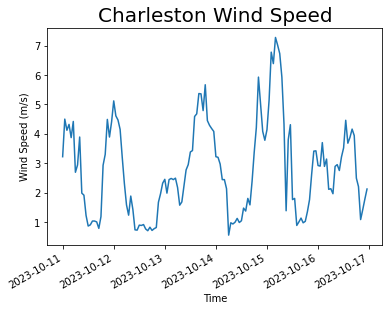

In [35]:
WtM_Wds.wind_speed.isel(geometry=0,height=0,time=range(0,144)).plot()
plt.title("Charleston Wind Speed",fontsize=20)
plt.xlabel("Time")
plt.ylabel("Wind Speed (m/s)")

Text(0, 0.5, 'Wind Direction (degrees)')

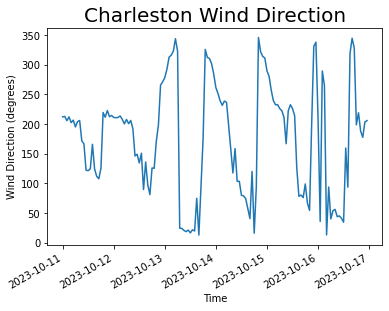

In [34]:
WtM_Wds.wind_direction.isel(geometry=0,height=0,time=range(0,144)).plot()
plt.title("Charleston Wind Direction",fontsize=20)
plt.xlabel("Time")
plt.ylabel("Wind Direction (degrees)")

Text(0, 0.5, 'Air Temperature (Celsius)')

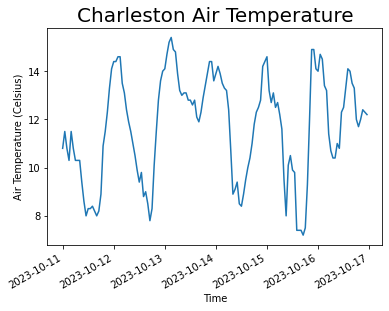

In [33]:
WtM_Wds.temperature.isel(geometry=0,height=0,time=range(0,144)).plot()
plt.title("Charleston Air Temperature",fontsize=20)
plt.xlabel("Time")
plt.ylabel("Air Temperature (Celsius)")

Text(0, 0.5, 'Relative Humidity (percentage)')

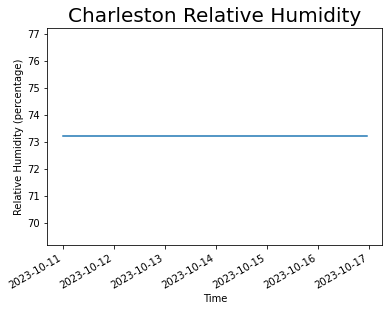

In [36]:
WtM_Wds.relative_humidity.isel(geometry=0,height=0,time=range(0,144)).plot()
plt.title("Charleston Relative Humidity",fontsize=20)
plt.xlabel("Time")
plt.ylabel("Relative Humidity (percentage)")

Text(0, 0.5, 'Precipitation (mm)')

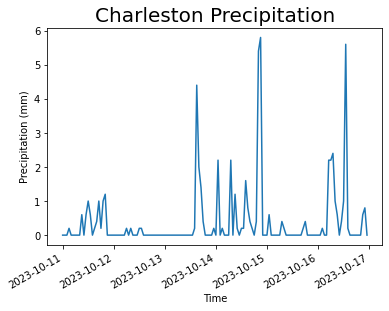

In [37]:
WtM_Wds.precipitation.isel(geometry=0,height=0,time=range(0,144)).plot()
plt.title("Charleston Precipitation",fontsize=20)
plt.xlabel("Time")
plt.ylabel("Precipitation (mm)")